## Fruits and Veggies - Nodes

In [1]:
import torch
import torchhd

from src.encoding.configs_and_constants import VSAModel
from src.utils.utils import cartesian_bind_tensor, TupleIndexer
from collections import defaultdict

vsa = VSAModel.HRR
D = 112 * 112  # 96 didn't give 100%
fruits_and_veggies = torchhd.random(28*6, D, vsa=vsa.value)
node_codebook = fruits_and_veggies
node_indexer = TupleIndexer([28, 6])

# Length 33
basket = [
    (0, 1),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 2),
    (0, 3),
    (2, 2),
    (2, 3),
    (0, 3),
    (2, 1),
    (0, 3),
    (0, 2),
    (0, 3),
    (0, 3),
    (0, 1),
    (2, 3),
    (0, 3),
    (0, 2),
    (0, 2),
    (0, 3),
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 1),
    (0, 3),
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 1),
    (2, 2),
    (0, 3),
    (5, 2),
]

print(basket)
print(len(basket))
unique_nodes = set(basket)
print(f"Unique Nodes -> {unique_nodes=}, {len(set(basket))=} ")
nodes_ground_truth = node_indexer.get_idxs(basket)
print(f"{sorted(set(nodes_ground_truth))=}")

nodes = [node_codebook[node_indexer.get_idx(t)] for t in basket]
embedding_0 = torchhd.multiset(torch.stack(nodes, dim=0))


d = torchhd.dot(embedding_0, node_codebook)
sim_node = torch.round(d).int().clamp(min=0)
## This should print 3, 0, 1, 0, 1, 0, 3, .... so many time as there items.
## And it does, so it should work
print(sim_node)
print(sim_node.sum().item())

[(0, 1), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 3), (2, 2), (2, 3), (0, 3), (2, 1), (0, 3), (0, 2), (0, 3), (0, 3), (0, 1), (2, 3), (0, 3), (0, 2), (0, 2), (0, 3), (0, 1), (0, 2), (0, 3), (0, 1), (0, 3), (0, 1), (0, 2), (0, 3), (1, 1), (2, 2), (0, 3), (5, 2)]
33
Unique Nodes -> unique_nodes={(0, 1), (2, 1), (1, 1), (0, 3), (2, 3), (0, 2), (2, 2), (5, 2)}, len(set(basket))=8 
sorted(set(nodes_ground_truth))=[1, 2, 3, 7, 13, 14, 15, 32]
HRRTensor([ 0,  5, 10, 11,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  2,  2,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   

## Fruits and Veggies -- Edges

In [2]:
## Now level 1
## Length 72
edge_indexes = [
    (0, 1),
    (1, 0),
    (1, 2),
    (2, 1),
    (2, 3),
    (3, 2),
    (3, 4),
    (4, 3),
    (4, 5),
    (5, 4),
    (5, 6),
    (6, 5),
    (6, 7),
    (6, 32),
    (7, 6),
    (7, 8),
    (8, 7),
    (8, 9),
    (8, 31),
    (9, 8),
    (9, 10),
    (9, 11),
    (10, 9),
    (11, 9),
    (11, 12),
    (11, 28),
    (12, 11),
    (12, 13),
    (13, 12),
    (13, 14),
    (13, 27),
    (14, 13),
    (14, 15),
    (14, 16),
    (15, 14),
    (16, 14),
    (16, 17),
    (16, 25),
    (17, 16),
    (17, 18),
    (17, 23),
    (18, 17),
    (18, 19),
    (19, 18),
    (19, 20),
    (20, 19),
    (20, 21),
    (20, 22),
    (21, 20),
    (22, 20),
    (22, 23),
    (23, 17),
    (23, 22),
    (23, 24),
    (24, 23),
    (25, 16),
    (25, 26),
    (25, 27),
    (26, 25),
    (27, 13),
    (27, 25),
    (28, 11),
    (28, 29),
    (28, 30),
    (29, 28),
    (30, 28),
    (30, 31),
    (31, 8),
    (31, 30),
    (31, 32),
    (32, 6),
    (32, 31),
]

print(f"{len(edge_indexes)=}")

edge_dict = defaultdict(list)
for src_tp, dst_tp in edge_indexes:
    edge_dict[src_tp].append(dst_tp)
print(edge_dict)
print(len(edge_dict))

keys = []
values = []
for src, dsts in edge_dict.items():
    keys.append(node_codebook[node_indexer.get_idx(basket[src])])
    values.append(torchhd.multiset(torch.stack([node_codebook[node_indexer.get_idx(basket[d])] for d in dsts], dim=0)))

keys = torch.stack(keys, dim=0)
values = torch.stack(values, dim=0)
edge_terms_hash = torchhd.hash_table(keys, values)
edge_terms_hash_norm = edge_terms_hash.normalize()

## LEVEL 1
edge_term_bindings_lvl1 = [
    torchhd.bind(
        node_codebook[node_indexer.get_idx(basket[src])],
        torchhd.multiset(torch.stack([node_codebook[node_indexer.get_idx(basket[d])] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
print(f"{len(edge_term_bindings_lvl1)=}")


# [node_dim, D]
edge_terms_lvl1 = torchhd.multiset(torch.stack(edge_term_bindings_lvl1, dim=0))

# compute L2 norm along the last dimension (out‐of‐place)
hr_norm = edge_terms_lvl1.norm(dim=-1, keepdim=True)                     # [node_dim, 1]

# divide by norm, also out‐of‐place
edge_terms_lvl1_norm = edge_terms_lvl1 / (hr_norm + 1e-8)

embedding_1 = torchhd.multiset(torch.stack([embedding_0, edge_terms_hash_norm], dim=0))

## LEVEL2
edge_term_bindings_lvl2 = [
    torchhd.bind(
        edge_term_bindings_lvl1[src],
        torchhd.multiset(
            torch.stack([edge_term_bindings_lvl1[d] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
edge_terms_lvl2 = torchhd.multiset(torch.stack(edge_term_bindings_lvl2, dim=0))
edge_terms_lvl2_norm = edge_terms_lvl2.normalize()
embedding_2 = torchhd.multiset(torch.stack([embedding_1, edge_terms_lvl2_norm], dim=0))


## LEVEL3
edge_term_bindings_lvl3 = [
    torchhd.bind(
        edge_term_bindings_lvl2[src],
        torchhd.multiset(
            torch.stack([edge_term_bindings_lvl2[d] for d in dsts], dim=0)),
    )
    for src, dsts in edge_dict.items()
]
edge_terms_lvl3 = torchhd.multiset(torch.stack(edge_term_bindings_lvl3, dim=0))
edge_terms_lvl3_norm = edge_terms_lvl3.normalize()
embedding_3 = torchhd.multiset(torch.stack([embedding_2, edge_terms_lvl3_norm], dim=0))


len(edge_indexes)=72
defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 7, 32], 7: [6, 8], 8: [7, 9, 31], 9: [8, 10, 11], 10: [9], 11: [9, 12, 28], 12: [11, 13], 13: [12, 14, 27], 14: [13, 15, 16], 15: [14], 16: [14, 17, 25], 17: [16, 18, 23], 18: [17, 19], 19: [18, 20], 20: [19, 21, 22], 21: [20], 22: [20, 23], 23: [17, 22, 24], 24: [23], 25: [16, 26, 27], 26: [25], 27: [13, 25], 28: [11, 29, 30], 29: [28], 30: [28, 31], 31: [8, 30, 32], 32: [6, 31]})
33
len(edge_term_bindings_lvl1)=33


In [3]:
edge_codebook = cartesian_bind_tensor([node_codebook, node_codebook])

In [4]:
## Let's optimize the edge decoder
from src.utils.utils import TupleIndexer


decoded_node_idx = sim_node.nonzero(as_tuple=True)[0].tolist()
print(f"{decoded_node_idx=}")
print(f"{len(decoded_node_idx)=}")

upper = [
    (decoded_node_idx[i], decoded_node_idx[j])
    for i in range(len(decoded_node_idx))
    for j in range(i, len(decoded_node_idx))
]
print(f"{upper=}")

lower = [(v, u) for u, v in upper]
print(f"{lower=}")

edge_indexer = TupleIndexer([node_codebook.shape[0], node_codebook.shape[0]])
print(f"{edge_indexer.get_sizes()=}")

upper_idxs = edge_indexer.get_idxs(upper)
print(f"{upper_idxs=}")
print(f"{len(upper_idxs)=}")

lower_idxs = edge_indexer.get_idxs(lower)
print(f"{lower_idxs=}")
print(f"{len(lower_idxs)=}")

upper_codebook = edge_codebook[upper_idxs]
print(f"{upper_codebook.shape=}")

lower_codebook = edge_codebook[lower_idxs]
print(f"{lower_codebook.shape=}")

decoded_node_idx=[1, 2, 3, 7, 13, 14, 15, 32]
len(decoded_node_idx)=8
upper=[(1, 1), (1, 2), (1, 3), (1, 7), (1, 13), (1, 14), (1, 15), (1, 32), (2, 2), (2, 3), (2, 7), (2, 13), (2, 14), (2, 15), (2, 32), (3, 3), (3, 7), (3, 13), (3, 14), (3, 15), (3, 32), (7, 7), (7, 13), (7, 14), (7, 15), (7, 32), (13, 13), (13, 14), (13, 15), (13, 32), (14, 14), (14, 15), (14, 32), (15, 15), (15, 32), (32, 32)]
lower=[(1, 1), (2, 1), (3, 1), (7, 1), (13, 1), (14, 1), (15, 1), (32, 1), (2, 2), (3, 2), (7, 2), (13, 2), (14, 2), (15, 2), (32, 2), (3, 3), (7, 3), (13, 3), (14, 3), (15, 3), (32, 3), (7, 7), (13, 7), (14, 7), (15, 7), (32, 7), (13, 13), (14, 13), (15, 13), (32, 13), (14, 14), (15, 14), (32, 14), (15, 15), (32, 15), (32, 32)]
edge_indexer.get_sizes()=[168, 168]
upper_idxs=[169, 170, 171, 175, 181, 182, 183, 200, 338, 339, 343, 349, 350, 351, 368, 507, 511, 517, 518, 519, 536, 1183, 1189, 1190, 1191, 1208, 2197, 2198, 2199, 2216, 2366, 2367, 2384, 2535, 2552, 5408]
len(upper_idxs)=36
lower_

In [5]:
from collections import Counter

sim_upper = torchhd.dot(embedding_1, upper_codebook)
sim_lower = torchhd.dot(embedding_1, lower_codebook)
sim_enhanced = (sim_upper + sim_lower)
print(f"{sim_enhanced=}")
print(f"{sim_enhanced.shape=}")
print(f"{sim_enhanced.nonzero().shape=}")

decoded_edges = []
for i in range(sim_enhanced.shape[0]):
    if sim_enhanced[i].item() > 0:  # Edge exists
        decoded_edges.append(upper[i])
        decoded_edges.append(lower[i])
print(f"{decoded_edges=}")
print(f"{len(decoded_edges)=}")

real_edges = [(node_indexer.get_idx(basket[u]), node_indexer.get_idx(basket[v])) for u, v in edge_indexes]
print(f"{real_edges=}")
print(f"{len(real_edges)=}")
print(f"{Counter(real_edges)=}")
print(f"{len(set(real_edges))=}")
print(f"{set(real_edges)=}")

sim_enhanced=HRRTensor([-0.7674, -0.2076,  0.1921, -0.4232,  0.1448, -0.4318, -0.2192,
           -0.2015,  2.0541,  1.5530,  0.4152,  0.1152, -0.1500,  0.0658,
           -0.1742,  0.7160, -0.4332, -0.7591,  0.4944,  0.7301,  0.2768,
           -0.2013, -0.3443,  0.3929, -0.0560, -0.3163, -0.0540, -0.3383,
            0.2399, -0.3985, -0.0271,  0.0530,  0.0604,  0.0031,  0.4341,
            0.5246])
sim_enhanced.shape=torch.Size([36])
sim_enhanced.nonzero().shape=torch.Size([36, 1])
decoded_edges=[(1, 3), (3, 1), (1, 13), (13, 1), (2, 2), (2, 2), (2, 3), (3, 2), (2, 7), (7, 2), (2, 13), (13, 2), (2, 15), (15, 2), (3, 3), (3, 3), (3, 14), (14, 3), (3, 15), (15, 3), (3, 32), (32, 3), (7, 14), (14, 7), (13, 15), (15, 13), (14, 15), (15, 14), (14, 32), (32, 14), (15, 15), (15, 15), (15, 32), (32, 15), (32, 32), (32, 32)]
len(decoded_edges)=36
real_edges=[(1, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 3), (3, 2), (3, 14), (3, 32), (14, 3), (14, 15), (15

In [6]:
# Unique Nodes -> unique_nodes={(0, 1), (2, 1), (1, 1), (0, 3), (2, 3), (0, 2), (2, 2), (5, 2)}, len(set(basket))=8
decode_node_tuples = node_indexer.get_tuples(decoded_node_idx)

In [7]:
import itertools

all_possible_edges = list(itertools.product(decode_node_tuples, decode_node_tuples))
print(f"{all_possible_edges=}")
print(f"{len(all_possible_edges)=}")

## Real edges
### real_edges=[(1, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 3), (3, 2), (3, 14), (3, 32), (14, 3), (14, 15), (15, 14), (15, 3), (15, 3), (3, 15), (3, 13), (3, 3), (13, 3), (3, 3), (3, 2), (3, 3), (2, 3), (2, 3), (3, 2), (3, 3), (3, 2), (3, 3), (3, 1), (3, 15), (1, 3), (15, 3), (15, 3), (15, 3), (3, 15), (3, 2), (3, 3), (2, 3), (2, 2), (2, 2), (2, 3), (3, 2), (3, 1), (3, 2), (1, 3), (2, 3), (2, 3), (3, 3), (3, 2), (3, 1), (1, 3), (3, 15), (3, 1), (3, 2), (1, 3), (2, 3), (2, 3), (3, 3), (3, 7), (3, 14), (7, 3), (14, 3), (14, 3), (3, 15), (3, 14), (3, 32), (32, 3), (32, 3)]
all_possible_edges_node_idx = [(node_indexer.get_idx(u), node_indexer.get_idx(v)) for  u, v in all_possible_edges]
print(f"{all_possible_edges_node_idx=}")
print(f"{len(all_possible_edges_node_idx)=}")

all_possible_edges=[((0, 1), (0, 1)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (1, 1)), ((0, 1), (2, 1)), ((0, 1), (2, 2)), ((0, 1), (2, 3)), ((0, 1), (5, 2)), ((0, 2), (0, 1)), ((0, 2), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (1, 1)), ((0, 2), (2, 1)), ((0, 2), (2, 2)), ((0, 2), (2, 3)), ((0, 2), (5, 2)), ((0, 3), (0, 1)), ((0, 3), (0, 2)), ((0, 3), (0, 3)), ((0, 3), (1, 1)), ((0, 3), (2, 1)), ((0, 3), (2, 2)), ((0, 3), (2, 3)), ((0, 3), (5, 2)), ((1, 1), (0, 1)), ((1, 1), (0, 2)), ((1, 1), (0, 3)), ((1, 1), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (2, 2)), ((1, 1), (2, 3)), ((1, 1), (5, 2)), ((2, 1), (0, 1)), ((2, 1), (0, 2)), ((2, 1), (0, 3)), ((2, 1), (1, 1)), ((2, 1), (2, 1)), ((2, 1), (2, 2)), ((2, 1), (2, 3)), ((2, 1), (5, 2)), ((2, 2), (0, 1)), ((2, 2), (0, 2)), ((2, 2), (0, 3)), ((2, 2), (1, 1)), ((2, 2), (2, 1)), ((2, 2), (2, 2)), ((2, 2), (2, 3)), ((2, 2), (5, 2)), ((2, 3), (0, 1)), ((2, 3), (0, 2)), ((2, 3), (0, 3)), ((2, 3), (1, 1)), ((2, 3), (2, 1)), ((2, 3), (2, 2)), ((2, 3),

In [8]:
real_deges = sorted(set(real_edges))
print(real_deges)

[(1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 7), (3, 13), (3, 14), (3, 15), (3, 32), (7, 3), (13, 3), (14, 3), (14, 15), (15, 3), (15, 14), (32, 3)]


## Decoding edge_terms Level 1

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
(1, 1) -> sim_b=HRRTensor(-0.0003) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
(1, 2) -> sim_b=HRRTensor(0.0592) -- Prediction(True), Real Edge(True), Upper-Lower-Method(False) -- CORRECT
(1, 3) -> sim_b=HRRTensor(0.2661) -- Prediction(True), Real Edge(True), Upper-Lower-Method(True) -- CORRECT
(1, 7) -> sim_b=HRRTensor(0.0031) -- Prediction(True), Real Edge(False), Upper-Lower-Method(False) -- WRONG
(1, 13) -> sim_b=HRRTensor(0.0015) -- Prediction(True), Real Edge(False), Upper-Lower-Method(True) -- WRONG
(1, 14) -> sim_b=HRRTensor(-0.0073) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
(1, 15) -> sim_b=HRRTensor(0.0031) -- Prediction(True

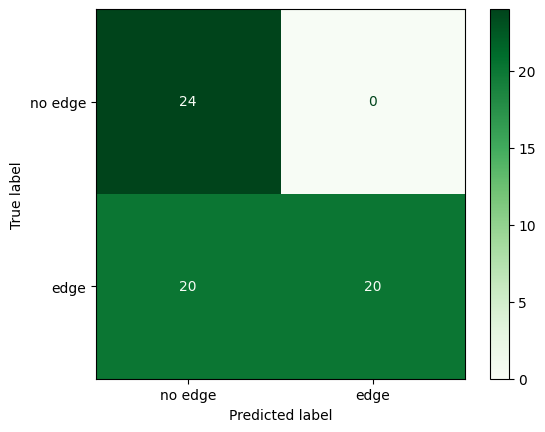

In [9]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges = []

for src_tp, dst_tp in all_possible_edges_node_idx:
    node_hv_bind = node_codebook[src_tp].bind(node_codebook[dst_tp])
    sim_b = torchhd.dot(edge_terms_hash_norm, node_hv_bind)
    edge = (src_tp, dst_tp)
    count_as_edge = sim_b > 0
    if count_as_edge:
        pred_edges.append(edge)
    truth = edge in real_edges
    y_true.append(int(count_as_edge))
    y_pred.append(int(truth))
    equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)

    print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges)}")
print(f"{sorted(pred_edges)=}")

print(f"{len(decoded_edges)=}")
print(f"{sorted(decoded_edges)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 1

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
((0, 1), (0, 1)) -> sim_b=HRRTensor(-0.0003) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 1)) -> sim_b=HRRTensor(0.0015) -- Prediction(True), Real Edge(False), Upper-Lower-Method(True) -- WRONG
((0, 1), (1, 1)) -> sim_b=HRRTensor(0.0031) -- Prediction(True), Real Edge(False), Upper-Lower-Method(False) -- WRONG
((0, 1), (0, 3)) -> sim_b=HRRTensor(0.2661) -- Prediction(True), Real Edge(True), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 3)) -> sim_b=HRRTensor(0.0031) -- Prediction(True), Real Edge(False), Upper-Lower-Method(False) -- WRONG
((0, 1), (0, 2)) -> sim_b=HRRTensor(0.0592) -- Prediction(True), Real Edge(True), Upper-Lower-Method(False) -- CORREC

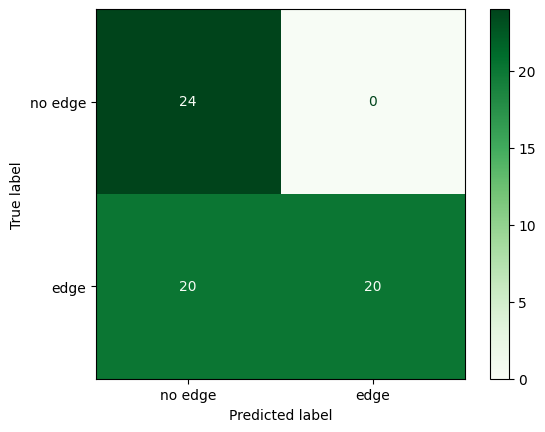

In [10]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(edge_terms_lvl1_norm)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 2

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
((0, 1), (0, 1)) -> sim_b=HRRTensor(-0.3794) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 1)) -> sim_b=HRRTensor(0.0675) -- Prediction(True), Real Edge(False), Upper-Lower-Method(True) -- WRONG
((0, 1), (1, 1)) -> sim_b=HRRTensor(-0.2135) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 3)) -> sim_b=HRRTensor(0.0942) -- Prediction(True), Real Edge(True), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 3)) -> sim_b=HRRTensor(-0.1100) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 2)) -> sim_b=HRRTensor(-0.1029) -- Prediction(False), Real Edge(True), Upper-Lower-Method(True) --

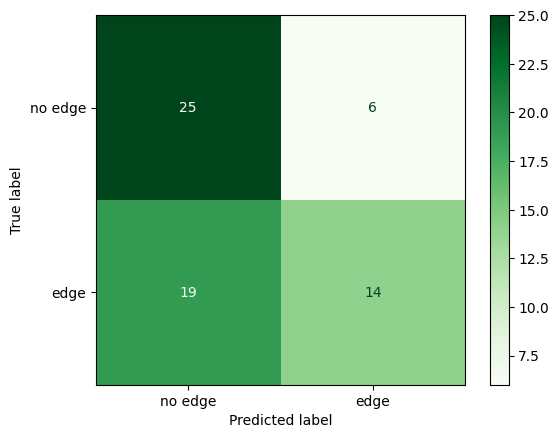

In [11]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(embedding_2)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Decoding Embedding 3

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
((0, 1), (0, 1)) -> sim_b=HRRTensor(-0.3862) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 1)) -> sim_b=HRRTensor(0.0676) -- Prediction(True), Real Edge(False), Upper-Lower-Method(True) -- WRONG
((0, 1), (1, 1)) -> sim_b=HRRTensor(-0.1947) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 3)) -> sim_b=HRRTensor(0.1238) -- Prediction(True), Real Edge(True), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 3)) -> sim_b=HRRTensor(-0.1060) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 2)) -> sim_b=HRRTensor(-0.0764) -- Prediction(False), Real Edge(True), Upper-Lower-Method(True) --

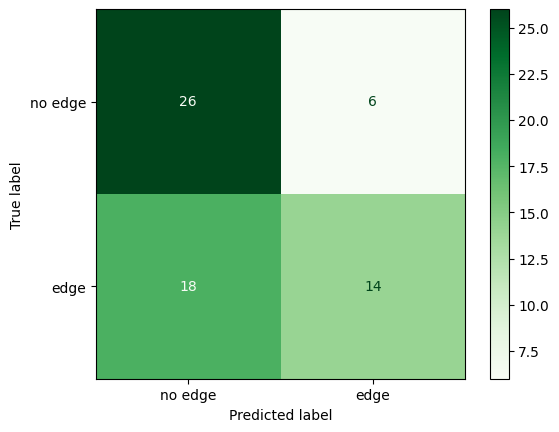

In [12]:
print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(embedding_3)
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


## Hashmap with Variables for Each Level

In [13]:
levels_vars = torchhd.random(5, D, vsa=vsa.value)

## Keep each level's hv in a variable in a hashmap
keys = levels_vars[0:4]

values = torch.stack([
    embedding_0, # Multiset of nodes
    edge_terms_lvl1_norm,
    edge_terms_lvl2_norm,
    edge_terms_lvl3_norm
], dim=0)

hashmap_levels_hg = torchhd.hash_table(keys, values)


### Decoding Nodes

In [14]:
level0_var = levels_vars[0]
lvl0_value_retrieved = level0_var.inverse().bind(hashmap_levels_hg)
d_hash = torchhd.dot(lvl0_value_retrieved, node_codebook)
sim_node_hash = torch.round(d_hash).int().clamp(min=0)
print(sim_node_hash)
print(sim_node_hash.sum().item())
decoded_node_idx_hash = sim_node_hash.nonzero(as_tuple=True)[0].tolist()
print(f"{decoded_node_idx_hash=}")
print(f"{len(decoded_node_idx_hash)=}")

HRRTensor([ 0,  5, 10, 11,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  2,  2,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
          dtype=torch.int32)
33
decoded_node_idx_hash=[1, 2, 3, 7, 13, 14, 15, 32]
len(decoded_node_idx_hash)=8


### Decoding edges level1

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
((0, 1), (0, 1)) -> sim_b=HRRTensor(0.0193) -- Prediction(True), Real Edge(False), Upper-Lower-Method(False) -- WRONG
((0, 1), (2, 1)) -> sim_b=HRRTensor(0.0096) -- Prediction(True), Real Edge(False), Upper-Lower-Method(True) -- WRONG
((0, 1), (1, 1)) -> sim_b=HRRTensor(-0.0092) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 3)) -> sim_b=HRRTensor(0.0284) -- Prediction(True), Real Edge(True), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 3)) -> sim_b=HRRTensor(0.0067) -- Prediction(True), Real Edge(False), Upper-Lower-Method(False) -- WRONG
((0, 1), (0, 2)) -> sim_b=HRRTensor(0.0129) -- Prediction(True), Real Edge(True), Upper-Lower-Method(False) -- CORREC

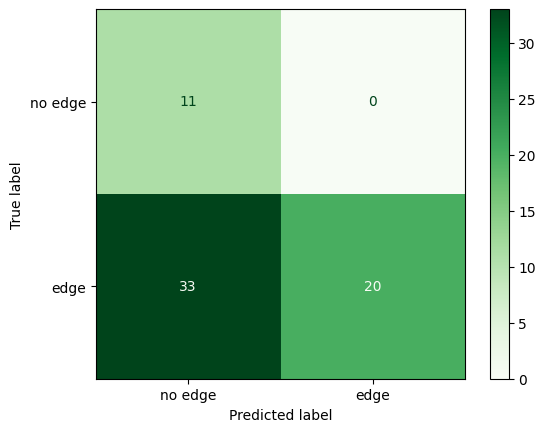

In [15]:
level1_var = levels_vars[1]
lvl1_value_retrieved = level1_var.inverse().bind(hashmap_levels_hg)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(lvl1_value_retrieved.normalize())
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()


### Decoding Edges Level 2

[(1, 3), (1, 13), (2, 2), (2, 3), (2, 7), (2, 13), (2, 15), (3, 1), (3, 2), (3, 3), (3, 14), (3, 15), (3, 32), (7, 2), (7, 14), (13, 1), (13, 2), (13, 15), (14, 3), (14, 7), (14, 15), (14, 32), (15, 2), (15, 3), (15, 13), (15, 14), (15, 15), (15, 32), (32, 3), (32, 14), (32, 15), (32, 32)]
((0, 1), (0, 1)) -> sim_b=HRRTensor(-0.0074) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (2, 1)) -> sim_b=HRRTensor(-0.0017) -- Prediction(False), Real Edge(False), Upper-Lower-Method(False) -- CORRECT
((0, 1), (1, 1)) -> sim_b=HRRTensor(-0.0163) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 3)) -> sim_b=HRRTensor(-0.0044) -- Prediction(False), Real Edge(True), Upper-Lower-Method(False) -- WRONG
((0, 1), (2, 3)) -> sim_b=HRRTensor(-0.0099) -- Prediction(False), Real Edge(False), Upper-Lower-Method(True) -- CORRECT
((0, 1), (0, 2)) -> sim_b=HRRTensor(-0.0038) -- Prediction(False), Real Edge(True), Upper-Lower-Method(Tr

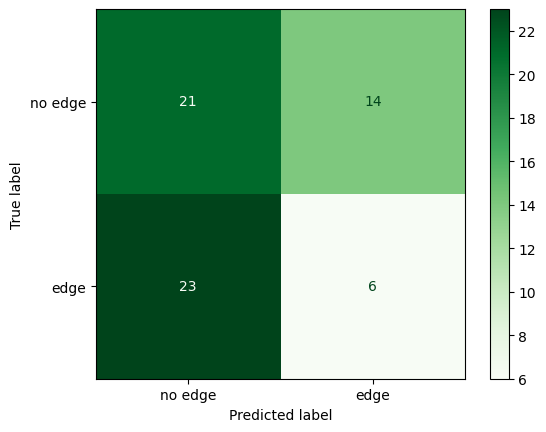

In [16]:
level2_var = levels_vars[2]
lvl2_value_retrieved = level2_var.inverse().bind(hashmap_levels_hg)

print(sorted(set(decoded_edges)))
y_true = []
y_pred = []
pred_edges_2 = []

for src_tp in unique_nodes:
    src_idx = node_indexer.get_idx(src_tp)
    values = node_codebook[src_idx].inverse().bind(lvl2_value_retrieved.normalize())
    for dst_tp in unique_nodes:
        dst_idx = node_indexer.get_idx(dst_tp)
        dst_hv = node_codebook[dst_idx]
        sim_b = torchhd.dot(values, dst_hv)
        edge = (src_idx, dst_idx)
        count_as_edge = sim_b >= 0
        if count_as_edge:
            pred_edges_2.append(edge)
        truth = edge in real_edges
        y_true.append(int(count_as_edge))
        y_pred.append(int(truth))
        equal_decode_edges_from_upper_lower = count_as_edge.item() == (edge in decoded_edges)
        print(f"({src_tp}, {dst_tp}) -> {sim_b=} -- Prediction({count_as_edge.item()}), Real Edge({truth}), Upper-Lower-Method({equal_decode_edges_from_upper_lower}) -- {'CORRECT' if truth == count_as_edge else 'WRONG'}")

print(f"{len(pred_edges_2)}")
print(f"{sorted(pred_edges_2)=}")

print(f"{len(real_edges)=}")
print(f"{sorted(real_edges)=}")

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) classification report (precision/recall/f1/accuracy)
print(classification_report(y_true, y_pred, digits=3))

# 2) confusion matrix as a DataFrame
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["no edge", "edge"])
disp.plot(cmap="Greens")
plt.show()
